<a href="https://colab.research.google.com/github/KyoldFusion/BreastCancerML/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_roc_curve
import pandas as pd
from statsmodels.multivariate.pca import PCA 
from numpy.linalg import eig
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



### **Data Visualization**

In [3]:
############# Original Heart Disease Dataframe ############################

df = pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


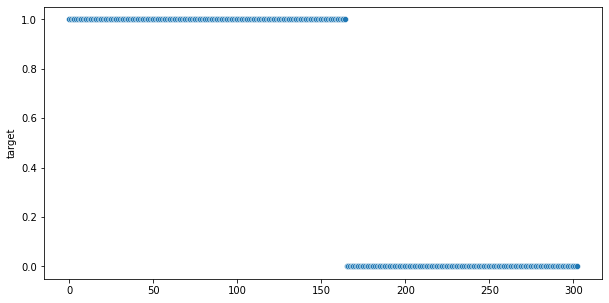

In [4]:
############# Scatter plot of target column (1 has disease and 0 doesn't has disease) ############################

scatter = pd.DataFrame()
scatter['target'] = df['target']
plt.figure(figsize=(10,5))
sns.scatterplot(data=scatter, x=scatter.index, y= 'target')

### **Logistic Regression**

In [5]:
############# Assign variables X and y ############################

X1 = df.drop(columns=['target'])
y1 = df['target']

In [6]:
############# Traian tests from X and y variables ############################

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.20, random_state=30)

In [7]:
############# Declare model as Logistic Regression ############################

model_1 = LogisticRegression(solver='liblinear')

In [8]:
############# Fit train variables to the model ############################

model_1.fit(X1_train, y1_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
############# Use the data set to make predicitons with the model ############################

y1_pred = model_1.predict(X1)
df["pred_target"] = model_1.predict(X1)



In [10]:
############# Model accuracy score ############################

model_1.score(X1_test, y1_test)

0.8360655737704918

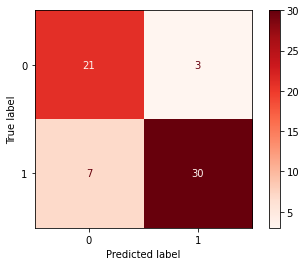

In [11]:
# Plot the Confusion Matrix values
plot_confusion_matrix(model_1, X1_test, y1_test, cmap=plt.cm.Reds)


In [12]:
df2 = pd.DataFrame({"Predicted": y1_pred, "Actual": y1})
df2.head(10)

,Predicted,Actual
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,1,1
8,1,1
9,1,1


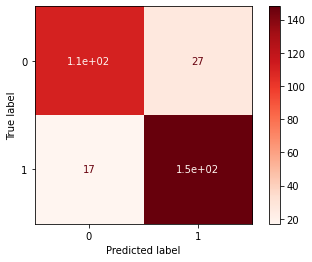

In [13]:
plot_confusion_matrix(model_1, X1, y1, cmap=plt.cm.Reds)

### **Data Balancing**


In [14]:
############# Count values of for 1 and 0 to detect possible imbalance ############################

print("Total Counts:")
print(y1.value_counts()) 

Total Counts:
1    165
0    138
Name: target, dtype: int64


In [15]:
df = df.drop(columns = 'pred_target')

In [16]:
########################## Create our Validation training and testing with a balancaed Dataframe ############################
B = df[df['target'] == 0].iloc[:138]
A = df[df['target'] == 1].iloc[:138]
x = pd.concat([A, B], ignore_index=True)
X2 = x.drop(columns = ['target'])
y2 = x['target']

In [17]:
############################ Balanced data ############################
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
272,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
273,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
274,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [18]:
######################### Confrim balanced data ############################
print("Total Counts:")
print(y2.value_counts())

Total Counts:
1    138
0    138
Name: target, dtype: int64


In [19]:
############# Train tests from X and y variables in balanced data ############################
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.25, random_state=1, stratify=y2)

In [20]:
########################## Create Logictic Regression Model based on the Balanced dataset ############################
model_2 = LogisticRegression(solver='liblinear')
model_2.fit(X2_train, y2_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
############# Use the new model to make predicitons ############################

y2_pred = model_2.predict(X2)
x["pred_target"] = model_2.predict(X2)

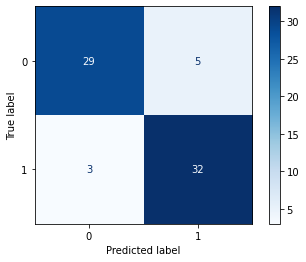

In [22]:
########################### Plot the Confusion Matrix values ############################
plot_confusion_matrix(model_2, X2_test, y2_test, cmap=plt.cm.Blues)

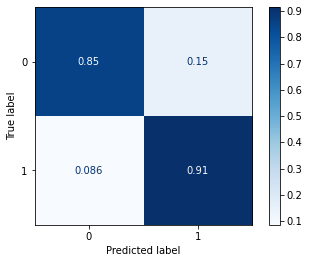

In [23]:
plot_confusion_matrix(model_2, X2_test, y2_test, cmap=plt.cm.Blues, normalize='true')

In [57]:
############################ Get model Accuracy score ############################
model_2.score(X2, y2)


0.8695652173913043

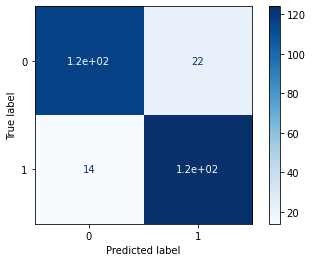

In [51]:
########################### Plot the Confusion Matrix values ############################
plot_confusion_matrix(model_2, X2, y2, cmap=plt.cm.Blues)

In [25]:
df3 = pd.DataFrame({"Predicted": y2_pred, "Actual": y2})
df3.value_counts()

Predicted  Actual
1          1         124
0          0         116
1          0          22
0          1          14
dtype: int64

### **Vizualizing the model errors** 

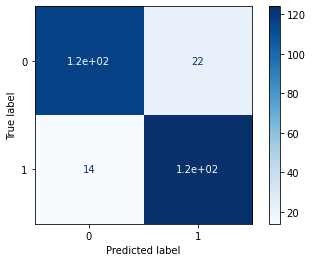

In [26]:
########################### Plot the Confusion Matrix values ############################
plot_confusion_matrix(model_2, X2, y2, cmap=plt.cm.Blues)

In [27]:
df_t1 = x[x["target"] == 1]
df_fn = df_t1[df_t1["pred_target"] == 0]
df_fn.head(14)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,pred_target
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1,0
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2,1,0
20,59,1,0,135,234,0,1,161,0,0.5,1,0,3,1,0
31,65,1,0,120,177,0,1,140,0,0.4,2,0,3,1,0
33,54,1,2,125,273,0,0,152,0,0.5,0,1,2,1,0
42,45,1,0,104,208,0,0,148,1,3.0,1,0,2,1,0
51,66,1,0,120,302,0,0,151,0,0.4,1,0,2,1,0
52,62,1,2,130,231,0,1,146,0,1.8,1,3,3,1,0
91,57,1,0,132,207,0,1,168,1,0.0,2,0,3,1,0
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1,0


In [28]:
df_t1 = x[x["target"] == 1]
df_tn = df_t1[df_t1["pred_target"] == 1]
#df_tn.iloc[20:40]
df_tn.sample(30)

#CA and SEX are the most changing so far in our opnion 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,pred_target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1
127,67,0,2,152,277,0,1,172,0,0.0,2,1,2,1,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1
67,45,0,1,130,234,0,0,175,0,0.6,1,0,2,1,1
82,60,0,2,102,318,0,1,160,0,0.0,2,1,2,1,1
70,54,1,2,120,258,0,0,147,0,0.4,1,0,3,1,1
39,65,0,2,160,360,0,0,151,0,0.8,2,0,2,1,1
62,52,1,3,118,186,0,0,190,0,0.0,1,0,1,1,1
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1,1
19,69,0,3,140,239,0,1,151,0,1.8,2,2,2,1,1


In [29]:
df_fn.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,pred_target
count,14.000000,14.000000,14.000000,14.000000,14.00000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.0,14.0
mean,57.071429,0.928571,0.642857,131.571429,237.00000,0.071429,0.642857,147.714286,0.214286,1.035714,1.285714,0.928571,2.428571,1.0,0.0
std,5.915615,0.267261,1.081818,17.740498,37.94125,0.267261,0.497245,15.934619,0.425815,1.279788,0.726273,1.439246,0.646206,0.0,0.0
min,45.000000,0.000000,0.000000,104.000000,177.00000,0.000000,0.000000,111.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,0.0
25%,53.250000,1.000000,0.000000,121.250000,211.75000,0.000000,0.000000,145.250000,0.000000,0.175000,1.000000,0.000000,2.000000,1.0,0.0
50%,57.000000,1.000000,0.000000,131.000000,232.00000,0.000000,1.000000,148.000000,0.000000,0.450000,1.000000,0.000000,2.500000,1.0,0.0
75%,61.250000,1.000000,1.500000,139.500000,262.25000,0.000000,1.000000,158.000000,0.000000,1.650000,2.000000,1.750000,3.000000,1.0,0.0
max,66.000000,1.000000,3.000000,178.000000,303.00000,1.000000,1.000000,169.000000,1.000000,4.200000,2.000000,4.000000,3.000000,1.0,0.0


In [30]:
df_tn.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,pred_target
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.0,124.0
mean,51.733871,0.516129,1.475806,128.782258,246.387097,0.177419,0.540323,160.653226,0.145161,0.555645,1.653226,0.241935,2.096774,1.0,1.0
std,9.196242,0.501767,0.905841,16.194730,56.311230,0.383573,0.500393,18.693090,0.353692,0.726871,0.570898,0.561226,0.430907,0.0,0.0
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0
25%,44.000000,0.000000,1.000000,120.000000,210.750000,0.000000,0.000000,152.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.0,1.0
50%,51.500000,1.000000,2.000000,130.000000,239.500000,0.000000,1.000000,162.000000,0.000000,0.200000,2.000000,0.000000,2.000000,1.0,1.0
75%,58.000000,1.000000,2.000000,140.000000,269.000000,0.000000,1.000000,173.000000,0.000000,1.000000,2.000000,0.000000,2.000000,1.0,1.0
max,74.000000,1.000000,3.000000,180.000000,564.000000,1.000000,1.000000,202.000000,1.000000,3.500000,2.000000,3.000000,3.000000,1.0,1.0


### **Reduzing the errors**

In [31]:
x = x.drop(columns = ['pred_target'])
df_fn = df_fn.drop(columns = ['pred_target'])

In [32]:
modeling = pd.concat([x, df_fn], ignore_index=True)
modeling

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
286,53,1,0,142,226,0,0,111,1,0.0,2,0,3,1
287,52,1,0,108,233,1,1,147,0,0.1,2,3,3,1
288,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1


In [33]:
X3 = modeling.drop(columns = ['target'])
y3 = modeling['target']

In [34]:
############# Train tests from X and y variables in balanced data ############################
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.25, random_state=49, stratify=y3)

In [35]:
########################## Create Logictic Regression Model based on the Balanced dataset ############################
model_3 = LogisticRegression(solver='liblinear')
model_3.fit(X3_train, y3_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
############# Use the new model to make predicitons ############################

y3_pred = model_3.predict(X2)
df_final = pd.DataFrame()
df_final["pred_target"] = model_3.predict(X2)
df_final['Actual'] = x['target']

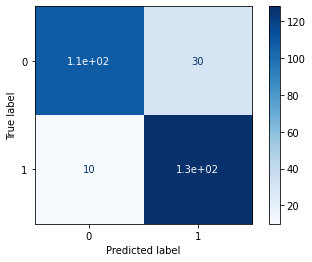

In [48]:
########################### Plot the Confusion Matrix values ############################
plot_confusion_matrix(model_3, X2, y2, cmap=plt.cm.Blues)

In [58]:
model_3.score(X2, y2)
# 0.8695652173913043

0.855072463768116

### **Comparing the resutls**

In [44]:
df2.value_counts()

Predicted  Actual
1          1         148
0          0         111
1          0          27
0          1          17
dtype: int64

In [45]:
df3.value_counts()

Predicted  Actual
1          1         124
0          0         116
1          0          22
0          1          14
dtype: int64

In [46]:
df_final.value_counts()

pred_target  Actual
1            1         128
0            0         108
1            0          30
0            1          10
dtype: int64

### **Random Forest Classifier Approach**

---



In [ ]:
model_R = RandomForestClassifier(n_estimators= 300)
model_R.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
model_R.score(X_test,y_test)

0.8524590163934426

In [ ]:
df2 = pd.DataFrame({"Predicted": y_pred, "Actual": y_test})
df2.head(10)

,Predicted,Actual
97,0,1
122,1,1
84,1,1
231,0,0
110,1,1
155,1,1
53,1,1
85,1,1
112,1,1
118,1,1


In [ ]:
print(f'Accuracy: {model.score(X_test, y_test)}')

Accuracy: 0.8852459016393442


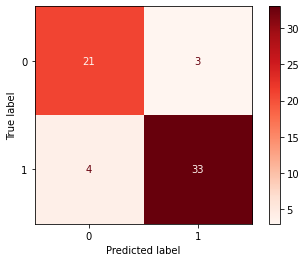

In [ ]:
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Reds)

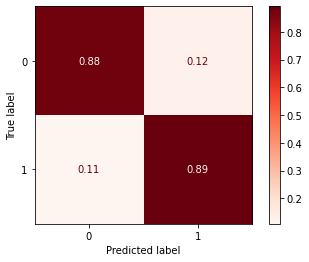

In [ ]:
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Reds, normalize='true')

In [ ]:
X_cov = X.cov()
X_cov


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,pred_target
age,77.061647,-0.322675,-0.389486,43.619789,101.692490,0.419170,-0.481818,-74.355428,0.383544,2.049868,-0.873992,3.056601,0.353557,-1.110962
sex,-0.322675,0.213900,-0.016522,-0.606509,-5.057549,0.006759,-0.009091,-0.691686,0.028630,0.056614,-0.013597,0.050277,0.060514,-0.060264
cp,-0.389486,-0.016522,1.072095,0.356996,-3.841107,0.043399,0.018182,6.741739,-0.191542,-0.152696,0.072885,-0.213439,-0.112490,0.269249
trestbps,43.619789,-0.606509,0.356996,314.444216,114.510198,1.200237,-0.796364,-19.089618,0.665481,4.174271,-1.560158,2.024348,0.625217,-1.555310
chol,101.692490,-5.057549,-3.841107,114.510198,2716.811700,-0.057233,-3.280000,-12.981502,1.191621,1.988237,0.126640,5.086482,2.733597,-1.880632
fbs,0.419170,0.006759,0.043399,1.200237,-0.057233,0.136957,-0.012727,-0.007075,0.000672,-0.006443,-0.013123,0.053597,-0.011502,0.003241
restecg,-0.481818,-0.009091,0.018182,-0.796364,-3.280000,-0.012727,0.272727,0.529091,-0.012727,-0.021818,0.036364,-0.047273,0.005455,0.021818
thalach,-74.355428,-0.691686,6.741739,-19.089618,-12.981502,-0.007075,0.529091,533.154611,-4.077958,-9.295238,5.560474,-5.553043,-1.354743,5.999868
exang,0.383544,0.028630,-0.191542,0.665481,1.191621,0.000672,-0.012727,-4.077958,0.228762,0.154516,-0.076206,0.059289,0.059328,-0.116812
oldpeak,2.049868,0.056614,-0.152696,4.174271,1.988237,-0.006443,-0.021818,-9.295238,0.154516,1.408192,-0.445644,0.303763,0.162443,-0.292069


In [ ]:
values, vectors = eig(X_cov)

In [ ]:
# Print Eigenvalues & Eigenvectors
print(f"Eigenvalues:\n{values}")
print()
print(f"Eigenvectors:\n{vectors}")

Eigenvalues:
[2.72647876e+03 5.47539824e+02 3.11551307e+02 5.65528804e+01
 1.50299420e+00 1.06775504e+00 7.35335752e-01 3.77604132e-01
 5.82052112e-02 2.81708449e-01 1.21975390e-01 1.54414613e-01
 1.84787792e-01 1.99766159e-01]

Eigenvectors:
[[ 3.93196983e-02  1.60630912e-01  1.21811708e-01 -9.78025867e-01
  -1.15043557e-02  9.10411297e-05  3.29339519e-02 -3.91642620e-03
  -6.22420695e-04  6.97489147e-04 -2.79425068e-03 -9.69896396e-04
  -5.98351533e-03 -1.10282742e-03]
 [-1.86477365e-03  1.21211640e-03 -1.47852809e-03  3.10515142e-03
   7.48138942e-02 -1.65163393e-02 -6.31083766e-02 -2.90894282e-01
   1.84341174e-01 -2.04073995e-01 -5.88699817e-02 -5.14562032e-01
  -7.49406382e-01 -5.79802553e-03]
 [-1.42523732e-03 -1.20391121e-02  4.27584277e-03 -1.20247289e-02
  -3.27955844e-01  7.70086909e-01 -4.65543930e-01 -1.81382040e-01
  -1.13875595e-01 -4.89191576e-02 -9.03944502e-02  1.42189603e-01
  -4.49254595e-02 -6.08490116e-02]
 [ 4.81574567e-02  1.01726588e-01  9.83453434e-01  1.41253

In [ ]:
# Confirm single value for first Eigenvector & Eigenvalue Product
# First Eigenvector = vectors[:,0]
# First Eigenvalue = values[0]
X_values = X_cov.values[0]
print(f"First Eigenvector: {vectors[:,0]} ")
print(f"First Eigenvalue: {values[0]} ")
print(f"Cov Matrix & Eigenvector Product: {(vectors[:,0][0]*X_values[0])+(vectors[:,0][1]*X_values[1])+(vectors[:,0][2]*X_values[2])+(vectors[:,0][3]*X_values[3])}")
print(f"Eigenvecotr & Eigenvalue Product: {vectors[:,0][0]*values[0]}")

First Eigenvector: [ 3.93196983e-02 -1.86477365e-03 -1.42523732e-03  4.81574567e-02
  9.98029315e-01  6.32448658e-06 -1.22332291e-03 -7.67533966e-03
  4.65230036e-04  8.58135606e-04 -9.75326981e-06  1.95839355e-03
  1.02090901e-03 -7.49306861e-04] 
First Eigenvalue: 2726.4787640963077 
Cov Matrix & Eigenvector Product: 5.131815645995519
Eigenvecotr & Eigenvalue Product: 107.20432254262838


In [ ]:
# Confirm all values for first Eigenvector & Eigenvalue with Dot Product Multiplication 
print(X_cov.dot(vectors[:,0]))
print(vectors[:,0].dot(values[0]))

age             107.204323
sex              -5.084266
cp               -3.885879
trestbps        131.300283
chol           2721.105732
fbs               0.017244
restecg          -3.335364
thalach         -20.926651
exang             1.268440
oldpeak           2.339689
slope            -0.026592
ca                5.339518
thal              2.783487
pred_target      -2.042969
dtype: float64
[ 1.07204323e+02 -5.08426575e+00 -3.88587929e+00  1.31300283e+02
  2.72110573e+03  1.72435784e-02 -3.33536393e+00 -2.09266506e+01
  1.26843981e+00  2.33968851e+00 -2.65920830e-02  5.33951844e+00
  2.78348675e+00 -2.04296925e+00]


In [ ]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,pred_target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439,-0.227782
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937,-0.280830
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798,0.510839
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931,-0.171781
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239,-0.070399
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046,0.000186
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230,0.096607
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741,0.508638
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757,-0.501141
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696,-0.491281


In [ ]:
pca = PCA(X, standardize=True, method='eig')
components_df = pca.factors

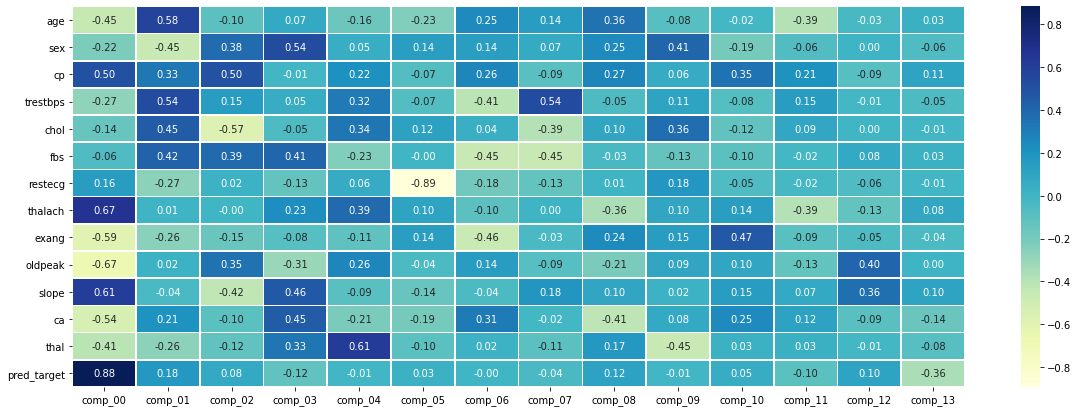

In [ ]:
# Combine the X varaibles and new principal compenents
combined_df = pd.concat([X, components_df], axis=1)

# Create a correlation matrix of all X variables and principal components
correlation = combined_df.corr()

# Creat a matrix showing the correlation between:
# Features vs Principal Components
# Remove the parts of the output to keep the correlation between features and principal components
# Keep Rows up till components: correlation[:-len(components_df.columns)]
# Keep Columns starting with compenents: .loc[:, 'comp_00':]
correlation_plot_data = correlation[:-len(components_df.columns)].loc[:, 'comp_00':]

# Plot Features vs Principal Components correlation matrix
fig, ax = plt.subplots(figsize=(20, 7))
sns.heatmap(correlation_plot_data, cmap='YlGnBu', linewidths=.7, annot=True, fmt='.2f')
plt.show()

In [ ]:
eigen_values = pd.DataFrame(data=pca.eigenvals.values, columns=['eigenvalue'])
print(eigen_values)

    eigenvalue
0   958.877286
1   442.725459
2   345.872733
3   324.036891
4   278.155519
5   272.995946
6   247.235069
7   207.653471
8   201.281166
9   171.697650
10  145.288812
11  119.391403
12   94.741579
13   54.047016


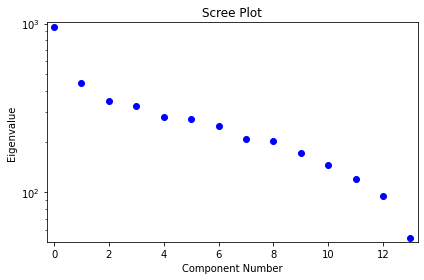

In [ ]:
pca.plot_scree()
plt.show()

In [ ]:
cumulative_variance_explained = pd.DataFrame(data=pca.rsquare.values, columns=['cumulative_var'])
print(cumulative_variance_explained)

    cumulative_var
0         0.000000
1         0.248157
2         0.362734
3         0.452245
4         0.536106
5         0.608092
6         0.678743
7         0.742727
8         0.796468
9         0.848559
10        0.892995
11        0.930595
12        0.961494
13        0.986013
14        1.000000


In [ ]:
cumulative_df =  components_df.iloc[:, :2]
cumulative_df

,comp_00,comp_01
0,0.008158,0.122482
1,0.029010,-0.042679
2,0.069203,-0.009380
3,0.063085,-0.029419
4,0.029245,0.015937
...,...,...
271,-0.046298,-0.025686
272,0.035526,-0.049536
273,-0.085124,0.034983
274,-0.069769,-0.101280


USING K-Means

In [ ]:
model = KMeans(n_clusters=5, random_state=5)
model.fit(X)
X["class"] = model.labels_